In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import kruskal

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Data load

In [2]:
data_path = "./data/data.csv"
df = pd.read_csv(data_path)

X= df.iloc[:,2:-1]
y = df.iloc[:,1].replace({'B': '0', 'M': '1'}).astype("int")

# 2. Model training

# split data, and standardization

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123,stratify=y)

scaler =  StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

# Logistic Regression

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logleg = logreg.predict(X_test_scaled)  ##

logreg_f1 = f1_score(y_test, y_pred_logleg)

print("lgleg f1_score : ", logreg_f1)

lgleg f1_score :  0.953125


# Support vector machine

In [5]:
svc = SVC(kernel="linear")
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)  ##

svc_f1 = f1_score(y_test, y_pred_svc)

print("svc f1_score : ", svc_f1)

svc f1_score :  0.9457364341085271


# Random Forest

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

rf_f1 = f1_score(y_test, y_pred_rf)

print("f1_score : ", rf_f1)

f1_score :  0.9612403100775194


## Xgboost

In [7]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)  ##

xgb_f1 = f1_score(y_test, y_pred_xgb)

print("f1_score : ", xgb_f1)

f1_score :  0.9538461538461539


In [8]:
print ('F1_score Comparisons for breast cancer Classification\n')
print ('logreg_score:', '{0:0.5f}'.format(logreg_f1))
print ('svc_score   :', '{0:0.5f}'.format(svc_f1))
print ('rfc_score   :', '{0:0.5f}'.format(rf_f1))
print ('xgb_score   :', '{0:0.5f}'.format(xgb_f1))


F1_score Comparisons for breast cancer Classification

logreg_score: 0.95312
svc_score   : 0.94574
rfc_score   : 0.96124
xgb_score   : 0.95385


# 3 Model analysis

top 5 weight :  ['fractal_dimension_se', 'compactness_se', 'fractal_dimension_mean', 'symmetry_se', 'compactness_mean']


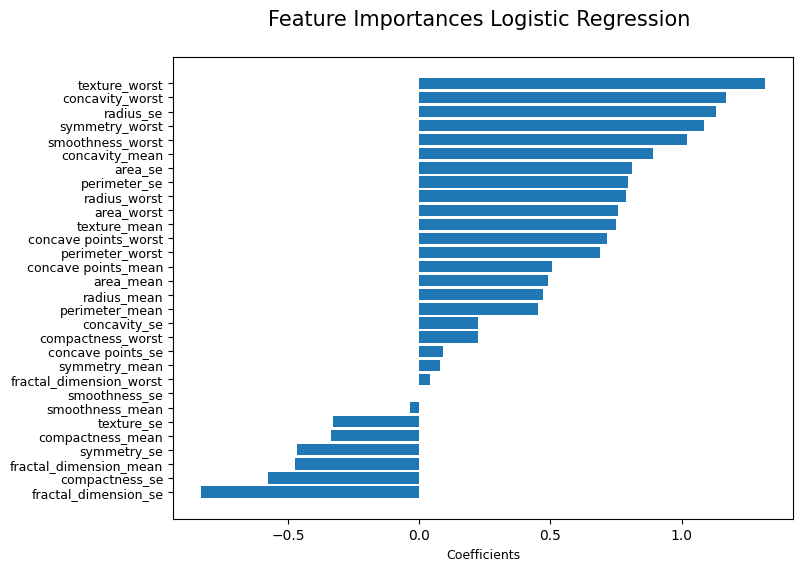

In [9]:
indices =  np.argsort(sum(logreg.coef_)) 
print("top 5 weight : ", X_test.columns[indices[:5]].to_list())
plt.figure(figsize=(8, 6))
plt.barh(X_test.columns, sum(logreg.coef_)[indices], align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=9)
plt.xlabel('Coefficients', fontsize=9)
plt.title('Feature Importances Logistic Regression \n',fontsize=15)
plt.show()

top 5 weight :  ['fractal_dimension_se', 'texture_se', 'symmetry_se', 'compactness_se', 'fractal_dimension_mean']


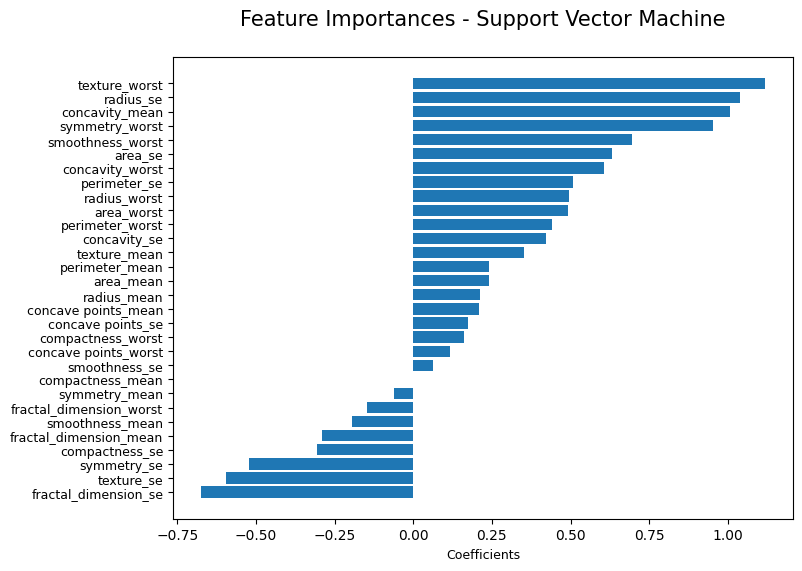

In [10]:
indices =  np.argsort(sum(svc.coef_))
print("top 5 weight : ", X_test.columns[indices[:5]].to_list())
plt.figure(figsize=(8, 6))
plt.barh(X_test.columns, sum(svc.coef_)[indices], align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=9)
plt.xlabel('Coefficients', fontsize=9)
plt.title('Feature Importances - Support Vector Machine\n', fontsize=15)
plt.show()

top 5 important col:  ['symmetry_se', 'compactness_se', 'smoothness_se', 'concavity_se', 'fractal_dimension_se']


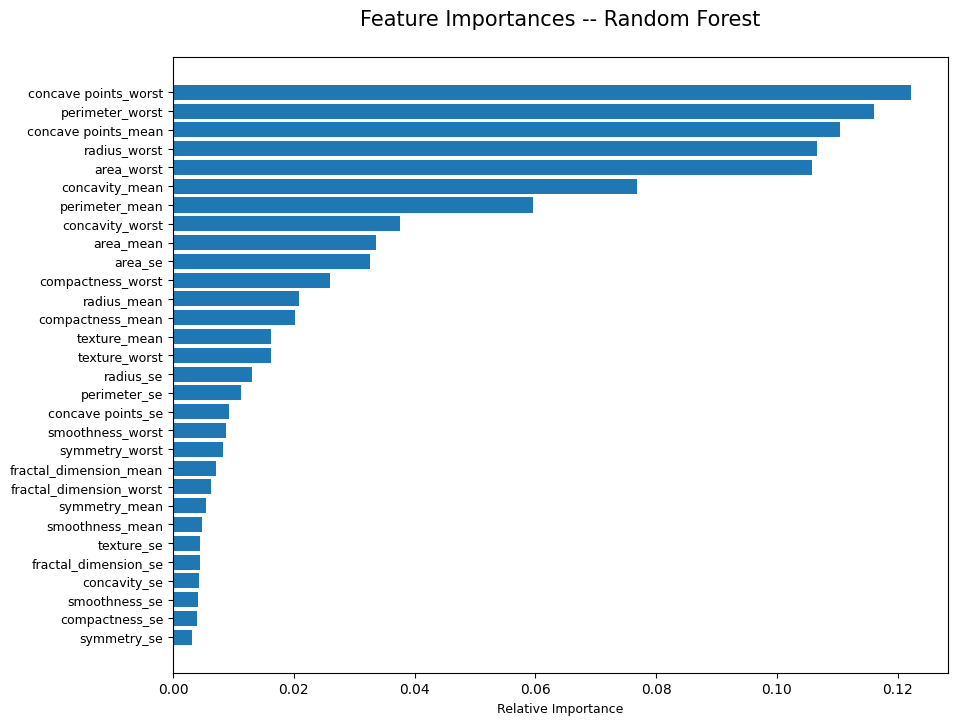

In [14]:
indices = np.argsort(rf.feature_importances_)
print("top 5 important col: ", X_test.columns[indices[:5]].to_list())
plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, rf.feature_importances_[indices], align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=9)

plt.xlabel('Relative Importance', fontsize=9)
plt.title('Feature Importances -- Random Forest\n', fontsize=15)
plt.show()

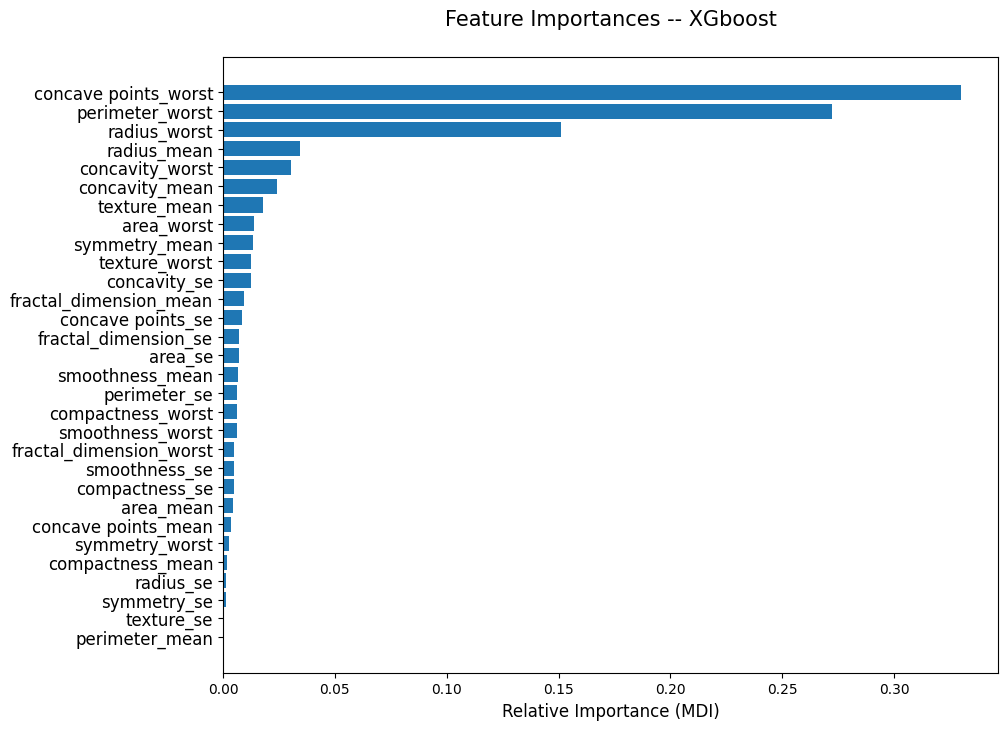

In [ ]:
indices = np.argsort(xgb.feature_importances_)
print("top 5 important col: ", X_test.columns[indices[:5]].to_list())
plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, xgb.feature_importances_[indices], align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- XGboost\n', fontsize=15)
plt.show()